In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import tweepy
%matplotlib inline

pd.set_option('display.max_colwidth',None)

## Table-of-Contents

<a href="#introduction">1.INTRODUCTION</a>

<a href="#gather">2.DATA GATHERING</a>

<a href="#assess">3.ASSESSMENT</a>
    <ul>
        <li><a href="#report">ASSESSMENT REPORT</a></li>
        <li><a href="#storage"> DATA STORAGE</a></li>
    </ul>
<a href="#clean">4. CLEANING</a>

<a href="#analyse">5. ANALYSIS</a>
   <li><a href="#insights">INSIGHTS</a></li>


<a id='introduction'></a>
# INTRODUCTION

WeRateDogs is a popular twitter account that rates people’s dogs with humorous comments. In
this project, I gathered data about this account manually from their archive file send to Udacity,
programmatically using Requests library from Udacity’s servers and via the Twitter API using tweepy.
The gathered data was then assessed both visually and programmatically for quality and tidiness issues.The quality and tidiness issues found are listed in the assessment report section.Subsequently,all identified issues were cleaned using the define-code-test framework.A master dataset was then produced,stored and used for analysis.

<a id='gather'></a>
# DATA GATHERING

### ENHANCED TWITTER ARCHIVE FILE

In [9]:
#load the twitter-archive-enhanced file into a dataframe
twitter_archive_df=pd.read_csv('twitter-archive-enhanced.csv')

In [10]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [64]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### IMAGE PREDICTIONS FILE

In [62]:
#download the image predictions file from the given adress
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
print(response)#response of 200 means the file was successfully downloaded

<Response [200]>


In [ ]:
open('image_predictions.tsv','wb').write(response.content)

In [65]:
#check the location of the tsv file
ls image_predictions.tsv

 Volume in drive C has no label.
 Volume Serial Number is 7098-8673

 Directory of C:\Users\user\Desktop\jupyter\We-Rate-Dogs-Project

09/06/2022  11:50           335,079 image_predictions.tsv
               1 File(s)        335,079 bytes
               0 Dir(s)  49,997,103,104 bytes free


In [66]:
predictions_df=pd.read_csv('image_predictions.tsv',sep='\t')

In [77]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [68]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### JSON FILE

In [49]:
#Twitter Api keys
consumer_key= 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [50]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [54]:
tweet_ids_array = twitter_archive_df['tweet_id'].values
print('the number of tweets ids:'+str(len(tweet_ids_array)))

the number of tweets ids:2356


In [56]:
#fetch additional information from the Twitter API using tweepy
count=0
list_of_tweets=[]
errors_dictionary={}
start=timer()
print('Fetching tweets starting....')
for tweet_id in tweet_ids_array:
    count += 1
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except tweepy.errors.TweepyException as err:
        errors_dictionary[tweet_id]=err
        pass
    if count % 100 == 0:
        print('progress report:')
        print('Milestone reached :'+str(count)+' fetches........')   
    
end=timer()
print('Fetching tweets Complete')
print('Total time taken '+str(end - start))
print('Found '+str(len(errors_dictionary))+' errors.To be listed below')
for tweet_id in errors_dictionary:
    print(tweet_id, errors_dictionary[tweet_id])

Fetching tweets starting....
progress report:
Milestone reached :100 fetches........
progress report:
Milestone reached :200 fetches........
progress report:
Milestone reached :300 fetches........
progress report:
Milestone reached :400 fetches........
progress report:
Milestone reached :500 fetches........
progress report:
Milestone reached :600 fetches........
progress report:
Milestone reached :700 fetches........
progress report:
Milestone reached :800 fetches........
progress report:
Milestone reached :900 fetches........


Rate limit reached. Sleeping for: 228


progress report:
Milestone reached :1000 fetches........
progress report:
Milestone reached :1100 fetches........
progress report:
Milestone reached :1200 fetches........
progress report:
Milestone reached :1300 fetches........
progress report:
Milestone reached :1400 fetches........
progress report:
Milestone reached :1500 fetches........
progress report:
Milestone reached :1600 fetches........
progress report:
Milestone reached :1700 fetches........
progress report:
Milestone reached :1800 fetches........


Rate limit reached. Sleeping for: 257


progress report:
Milestone reached :1900 fetches........
progress report:
Milestone reached :2000 fetches........
progress report:
Milestone reached :2100 fetches........
progress report:
Milestone reached :2200 fetches........
progress report:
Milestone reached :2300 fetches........
Fetching tweets Complete
Total time taken 2229.9424532999983
Found 32 errors.To be listed below
888202515573088257 404 Not Found
144 - No status found with that ID.
873697596434513921 404 Not Found
144 - No status found with that ID.
872668790621863937 404 Not Found
144 - No status found with that ID.
872261713294495745 404 Not Found
144 - No status found with that ID.
869988702071779329 404 Not Found
144 - No status found with that ID.
866816280283807744 404 Not Found
144 - No status found with that ID.
861769973181624320 404 Not Found
144 - No status found with that ID.
856602993587888130 404 Not Found
144 - No status found with that ID.
856330835276025856 404 Not Found
34 - Sorry, that page does not exi

In [57]:
list_of_json_tweet_objects=[]
for each_json_tweet in list_of_tweets:
    list_of_json_tweet_objects.append(each_json_tweet._json)

In [58]:
with open('tweets_json.txt','w') as file:
    file.write(json.dumps(list_of_json_tweet_objects,indent=4))

In [59]:
ls tweets_json.txt

 Volume in drive C has no label.
 Volume Serial Number is 7098-8673

 Directory of C:\Users\user\Desktop\jupyter\We-Rate-Dogs-Project

13/06/2022  12:37        17,966,494 json_tweets_file.txt
               1 File(s)     17,966,494 bytes
               0 Dir(s)  53,620,092,928 bytes free


In [72]:
#Build a dataframe row by row from the json file
#adapted from https://stackoverflow.com/questions/2110459/json-to-pandas-dataframe

list_of_keys=[]
with open('tweets_json.txt',encoding='utf-8') as json_file:
    tweets_data_dictionary=json.load(json_file)
    for each_key in tweets_data_dictionary:
        tweet_id=each_key['id']
        favorite_count=each_key['favorite_count']
        retweet_count=each_key['retweet_count']
        created_at=each_key['created_at']
        whole_source=each_key['source']
        only_device=whole_source[whole_source.find('rel="nofollow">')+ 15:-4]
        source=only_device
        retweeted_status=each_key['retweeted_status']=each_key.get('retweeted_status','Original tweet')
        
        list_of_keys.append({'tweet_id': tweet_id,
                         'favorite_count': favorite_count,
                         'retweet_count': retweet_count,
                         'created_at': created_at,
                          'source': source,
                          'retweeted_status': retweeted_status,
                           })
        
    
        fetched_tweets_df=pd.DataFrame(list_of_keys,columns=['tweet_id','favorite_count','retweet_count','created_at','source','retweeted_status'])

In [78]:
fetched_tweets_df.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
0,892420643555336193,33852,7019,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet
1,892177421306343426,29359,5303,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet
2,891815181378084864,22079,3486,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet
3,891689557279858688,36973,7232,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet
4,891327558926688256,35347,7773,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet


In [74]:
fetched_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2324 non-null   int64 
 1   favorite_count    2324 non-null   int64 
 2   retweet_count     2324 non-null   int64 
 3   created_at        2324 non-null   object
 4   source            2324 non-null   object
 5   retweeted_status  2324 non-null   object
dtypes: int64(3), object(3)
memory usage: 109.1+ KB


<a id='assess'></a>
# ASSESSEMENT

### TWITTER ARCHIVE FILE

#### VISUAL ASSESSMENT

In [79]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


> #### QUICK NOTE
#### QUALITY
- There appears to be 3 rows in the name column with single letter 'a'.There is need for further programmatic assessment here

#### TIDINESS
- There are four different columns for dog stages i.e. doggo,floofer,pupper,puppo

#### PROGRAMMATIC ASSESSMENT

In [81]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> #### QUICK NOTE
#### QUALITY
- There are 78 replies found in these columns: 'in_reply_to_status_id' and 'in_reply_to_user_id'
- There are 181 retweets found in these columns: 'retweeted_status_id';'retweeted_status_user_id' and 'retweeted_status_timestamp'
- There are 59 missing values in the expanded_urls column
- timestamp is in string format

#### TIDINESS
- As noted in the visual assessment,there are four columns for dog stages i.e. doggo,floofer,pupper,puppo


In [83]:
#check if there are duplicates
sum(twitter_archive_df.duplicated())

0

No duplicates found!

In [84]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [85]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [86]:
twitter_archive_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1914,674330906434379776,6.658147e+17,16374678.0,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


> #### QUICK NOTE
#### QUALITY
- As picked out in the visual assessment,name column has values with single letter 'a'
- There are values of None in the name column

>Let us further investigate the name column beginning with the value counts

In [87]:
twitter_archive_df['name'].value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Buddy        7
an           7
Toby         7
Daisy        7
Bailey       7
Scout        6
Jack         6
Jax          6
Bella        6
Dave         6
Koda         6
Milo         6
Oscar        6
Leo          6
Rusty        6
Stanley      6
Finn         5
Name: name, dtype: int64

> Firstly, I notice there are other suspicious dog name names besides 'a' which are 'an' and 'the'.
>
> Secondly,it looks like every other dog name starts with a block letter except our suspects!
>
>Let us then check for all other dog names that begin with a small letter

In [89]:
twitter_archive_df.where(twitter_archive_df['name'].str.islower())['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
getting          2
actually         2
not              2
his              1
infuriating      1
this             1
unacceptable     1
space            1
life             1
by               1
incredibly       1
such             1
light            1
all              1
my               1
officially       1
old              1
Name: name, dtype: int64

All these names do not look like valid names.Let us just check their total

In [91]:
sum(twitter_archive_df.where(twitter_archive_df['name'].str.islower())['name'].value_counts())

109

> #### QUICK NOTE
#### QUALITY
- There are 109 invalid names 

In [92]:
twitter_archive_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


> #### QUICK NOTE
#### QUALITY
- the minimum value for both rating numerator and rating denominator is 0
- the maximum for rating_numerator is 1776 while the maximum for rating_denominator is 170.They look suspiciously too big,there is need for further investigation here.

 **rating_denominator further assessment**

In [95]:
twitter_archive_df.loc[twitter_archive_df['rating_denominator']==170][['text','tweet_id','rating_numerator','rating_denominator']]

,text,tweet_id,rating_numerator,rating_denominator
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170


It looks like there are **multiple**  doggos in this particular row with a rating_denominator of 170.Lets check for the value count to assess the rating_denominator values in the dataset.

In [96]:
twitter_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

The overwhelming rating_denominator is 10.So lets check out all original tweets with a rating_denominator over 10 in order to assess if they are legit

In [97]:
twitter_archive_df.loc[(twitter_archive_df['rating_denominator'] >10) & (twitter_archive_df['in_reply_to_status_id'].isna()) & (twitter_archive_df['retweeted_status_id'].isna())][['text','tweet_id','rating_numerator','rating_denominator']]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",709198395643068416,45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,704054845121142784,60,50


Lets further investigate rating_denominator of 0

In [98]:
twitter_archive_df.loc[(twitter_archive_df['rating_denominator'] ==0) & (twitter_archive_df['in_reply_to_status_id'].isna()) & (twitter_archive_df['retweeted_status_id'].isna())][['text','tweet_id','rating_numerator','rating_denominator']]

,text,tweet_id,rating_numerator,rating_denominator


It appears the entry with a rating_denominator of 0 is either a reply or retweet

> #### QUICK NOTE
#### QUALITY
- There are 12 rows with multiple dogs in one picture 
- inaccurate entries for following tweet ids:
 
  |Tweet ID               |Incorrect rating                       |Correct rating|
  |-----------------------|---------------------------------------|--------------|
  |740373189193256964     |9/11                                   |14/10         |
  |716439118184652801     |50/50                                  |11/10         |
  |682962037429899265     |7/11                                   |10/10         |
   

**rating numerator further assessment**

In [99]:
twitter_archive_df.loc[twitter_archive_df['rating_numerator']==1776][['text','tweet_id','rating_numerator','rating_denominator']]

,text,tweet_id,rating_numerator,rating_denominator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,749981277374128128,1776,10


This looks quite legit.Lets use value_counts to assess the other ratings_numerator values in the dataset

In [100]:
twitter_archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

It looks like the majority of tweets have a numerator_rating of 14 and below.Let us check out all the tweets that have numerator_ratings above 14 and rating denominator of 10 to find out if indeed they are legit.

In [101]:
twitter_archive_df.loc[(twitter_archive_df['rating_numerator'] >14) & (twitter_archive_df['rating_denominator'] ==10) & (twitter_archive_df['in_reply_to_status_id'].isna()) & (twitter_archive_df['retweeted_status_id'].isna())][['text','tweet_id','rating_numerator','rating_denominator']]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,670842764863651840,420,10


#### QUICK NOTE
> **QUALITY**
- There are three rows with inaccurate ratings that contain decimal point values
|tweet_id          |rating   |
|------------------|---------|
|786709082849828864|9.75/10  |
|778027034220126208|11.27/10 |
|680494726643068929|11.26/10 |

- While the two tweets with rating numerator of 1776 (tweet_id:749981277374128128) and 420 (tweet_id :670842764863651840) seem accurate,they are outliers as every other tweet has a rating of 14 and below

In [102]:
twitter_archive_df.loc[(twitter_archive_df['rating_numerator'] ==0) & (twitter_archive_df['in_reply_to_status_id'].isna()) & (twitter_archive_df['retweeted_status_id'].isna())][['text','tweet_id','rating_numerator','rating_denominator']]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,835152434251116546,0,10


rating_numerator of 0 is correct indeed

### PREDICTIONS FILE

#### VISUAL ASSESSMENT

In [103]:
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Dataframe looks tidy and clean at first glance.Lets use programmatic assessment to get better insight.

#### PROGRAMMATIC ASSESSMENT

In [104]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [105]:
#check for duplicates
sum(predictions_df.duplicated())

0

Let us check if the number of rows in this predictions file is the same number as the rows in the twitter archive file

In [106]:
len(predictions_df)-len(twitter_archive_df)

-281

-281 means that there are 281 more rows in the twitter-archive file than the predictions file

#### QUICK NOTE
> **QUALITY**
- There are 281 more rows in the twitter archive file than in the predictions file so these will classified as missing data

We know that image numbers must be between 1-4 while confidence scores should be between 0 and 1.Let us check if that is true in our dataset

In [107]:
predictions_df[['img_num','p1_conf','p2_conf','p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


For image number,the minimun is 1 and the maximum is 4 so that is accurate.For confidence scores, the range is between 0 and 1 so that is accurate as well.

In [108]:
predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

#### QUICK NOTE
> **QUALITY**
- There are 543 predictions that do not predict dog breeds


### JSON FILE

#### VISUAL ASSESSMENT

In [109]:
fetched_tweets_df

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
0,892420643555336193,33852,7019,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet
1,892177421306343426,29359,5303,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet
2,891815181378084864,22079,3486,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet
3,891689557279858688,36973,7232,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet
4,891327558926688256,35347,7773,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet
...,...,...,...,...,...,...
2319,666049248165822465,89,37,Mon Nov 16 00:24:50 +0000 2015,Twitter for iPhone,Original tweet
2320,666044226329800704,246,115,Mon Nov 16 00:04:52 +0000 2015,Twitter for iPhone,Original tweet
2321,666033412701032449,99,36,Sun Nov 15 23:21:54 +0000 2015,Twitter for iPhone,Original tweet
2322,666029285002620928,112,39,Sun Nov 15 23:05:30 +0000 2015,Twitter for iPhone,Original tweet


#### PROGRAMMATICAL ASSESSMENT

In [111]:
fetched_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2324 non-null   int64 
 1   favorite_count    2324 non-null   int64 
 2   retweet_count     2324 non-null   int64 
 3   created_at        2324 non-null   object
 4   source            2324 non-null   object
 5   retweeted_status  2324 non-null   object
dtypes: int64(3), object(3)
memory usage: 109.1+ KB


In [114]:
#check if twitter archive file and json file are of the same length
len(fetched_tweets_df)-len(twitter_archive_df)

-32

#### QUICK NOTE
> **QUALITY**
- there are 32 missing rows in the json file.These can be attributed to the 32 errors we found while fetching tweets using the API
- created_at column is in string format

In [115]:
fetched_tweets_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.324000e+03,2324.000000,2324.000000
mean,7.418824e+17,7069.579604,2477.353701
std,6.820654e+16,10977.677524,4192.164106
min,6.660209e+17,0.000000,1.000000
25%,6.783205e+17,1230.000000,497.750000
50%,7.182408e+17,3059.000000,1155.000000
75%,7.986673e+17,8633.750000,2867.000000
max,8.924206e+17,145042.000000,70842.000000


Favourite count ranges from 0-145042 and Retweet_count ranges from 1-70842.There are no negative values or decimal values.These look legit.

In [116]:
fetched_tweets_df['source'].value_counts()

Twitter for iPhone     2190
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

<a id='report'></a>
## ASSESSMENT REPORT

###  QUALITY

1. There are 78 replies found in these columns: 'in_reply_to_status_id' and 'in_reply_to_user_id'
2. There are 181 retweets found in these columns: 'retweeted_status_id';'retweeted_status_user_id' and     'retweeted_status_timestamp'
3. There are 59 missing values in the expanded_urls column 
4. There are 32 missing rows in the json file.These correspond to the 32 errors we found while fetching tweets using the API 
5. There are 109 invalid names
6. There are three inaccurate entries in the ratings_denominator column
 |Tweet ID	           |Incorrect rating	|Correct rating|
 |---------------------|--------------------|--------------|
 |740373189193256964   |9/11	            |14/10         |
 |716439118184652801   |50/50	            |11/10         |
 |682962037429899265   |7/11	            |10/10         |
7. There are 12 rows with inaccurate ratings because they contain multiple dogs in one picture 
8. There are three rows with inaccurate ratings that contain decimal point values
|tweet_id	       |rating      |
|------------------|------------|
|786709082849828864|    9.75/10 |
|778027034220126208|	11.27/10|
|680494726643068929|	11.26/10|


9. There are two outliers in the rating numerator column of archive file: 1776 (tweet_id:749981277374128128) and 420 (tweet_id :670842764863651840)
10. Timestamp column is in string format
11. There are 543 predictions that do not predict dog breeds in the predictions file
12.  There are 281 missing rows in the image predictions file

### TIDINESS

1. The following columns [in_reply_to_status_id, in_reply_to_user_id] contain replies therefore not required
2. The following columns [retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] contain retweets therefore not required 
3. Since the only rating denominator is 10,that column is not necessary
4. There are four columns for dog stages i.e. doggo,floofer,pupper,puppo in the twitter archive file 
5. Information required for analysis is stored in various columns from the 3 different gathered files so there is need to merge the relevant columns from these files into one dataset

<a id='clean'></a>
# CLEANING

In [165]:
#make copies of datasets
twitter_archive_clean=twitter_archive_df.copy()
predictions_clean=predictions_df.copy()
fetched_tweets_clean=fetched_tweets_df.copy()

### QUALITY ISSUE 1:
There are 78 replies found in these columns: 'in_reply_to_status_id' and 'in_reply_to_user_id'


**DEFINE**
- All rows containing non-null values in the in_reply_to_status_id and in_reply_to_user_id will be dropped because they contain replies

**CODE**

In [166]:
#drop all non null values
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

**TEST**

In [167]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

### QUALITY ISSUE 2:
There are 181 retweets found in these columns: 'retweeted_status_id';'retweeted_status_user_id' and 'retweeted_status_timestamp

**DEFINE**
- All rows containing non-null values in the abovementioned columns will be dropped since they contain retweets

**CODE**

In [168]:
#remove all non null values in the retweeted_status_id column
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

**TEST**

In [169]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### QUALITY ISSUE 3:
There are 59 missing values in the expanded_urls column

**DEFINE**
- The 59 missing rows in the expanded_urls column will be dropped

**CODE**

In [170]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['expanded_urls'].notnull()]

**TEST**

In [171]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

### QUALITY ISSUE 4:
There are 32 missing rows in the json file.These can be attributed to the 32 errors we found while fetching tweets using the API

**DEFINE**
- The 32 erronous tweets were not appended to the dataframe therefore there is nothing to do here.

### QUALITY ISSUE 5:
- There are 109 invalid names in the archive file

**DEFINE**

- There are 109 invalid names that will be replace with None.The invalid names all begin with a small letter as opposed to a capital letter.

**CODE**

In [172]:
#replace invalid names with 'None'
twitter_archive_clean['name']=np.where(twitter_archive_clean['name'].str.islower(),'None',twitter_archive_clean['name'])

**TEST**

In [173]:
#count the number of values that begin with small letter in the name column.A value of 0 means they have been successfully clean
sum(twitter_archive_clean.where(twitter_archive_clean['name'].str.islower())['name'].value_counts())

0

In [174]:
twitter_archive_clean.shape

(2094, 17)

### QUALITY ISSUE 6:
There are three inaccurate entries in the ratings_denominator column

**DEFINE**
- The following tweets have their ratings messed up.They will be manually fixed
1.Tweet id:740373189193256964   will be fixed to 14/10         
2.Tweet id:716439118184652801   will be fixed to 11/10         
3.Tweet id:682962037429899265   will be fixed to 10/10 

**CODE**

In [175]:
#replaces the incorrect values with the correct ones
tweet_id1=740373189193256964
twitter_archive_clean['rating_numerator'].mask(twitter_archive_clean['tweet_id']==tweet_id1,14,inplace=True)
twitter_archive_clean['rating_denominator'].mask(twitter_archive_clean['tweet_id']==tweet_id1,10,inplace=True)

tweet_id2=716439118184652801
twitter_archive_clean['rating_numerator'].mask(twitter_archive_clean['tweet_id']==tweet_id2,11,inplace=True)
twitter_archive_clean['rating_denominator'].mask(twitter_archive_clean['tweet_id']==tweet_id2,10,inplace=True)

tweet_id3=682962037429899265
twitter_archive_clean['rating_numerator'].mask(twitter_archive_clean['tweet_id']==tweet_id3,10,inplace=True)
twitter_archive_clean['rating_denominator'].mask(twitter_archive_clean['tweet_id']==tweet_id3,10,inplace=True)

**TEST**

In [176]:
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] ==740373189193256964)| (twitter_archive_clean['tweet_id'] ==716439118184652801) | (twitter_archive_clean['tweet_id'] ==682962037429899265)][['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
1068,740373189193256964,14,10
1202,716439118184652801,11,10
1662,682962037429899265,10,10


### QUALITY ISSUE 7:
There are 12 rows with inaccurate ratings because they contain multiple dogs in one picture

**DEFINE**
- The 12 rows with inaccurate ratings have a denominator that is not 10.Thus all rows that do not have denominator of 10 will be dropped

**CODE**

In [177]:
#drop all rows that do not have denominator of 10
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

**TEST**

In [178]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2080
Name: rating_denominator, dtype: int64

### QUALITY ISSUE 8:
There are three rows with inaccurate ratings that contain decimal point values

**DEFINE**
- The following tweets will be removed as they contain inaccurate ratings
1. 786709082849828864	rating 9.75/10
2. 778027034220126208	rating 11.27/10
3. 680494726643068929	rating 11.26/10

**CODE**

In [179]:
#remove the rows with the identified tweet ids
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id']==786709082849828864].index,inplace=True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id']==778027034220126208].index,inplace=True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id']==680494726643068929].index,inplace=True)

**TEST**

In [180]:
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] ==786709082849828864)| (twitter_archive_clean['tweet_id'] ==778027034220126208) | (twitter_archive_clean['tweet_id'] ==680494726643068929)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### QUALITY ISSUE 9:
There are two outliers in the rating numerator column of archive file: 1776 (tweet_id:749981277374128128) and 420 (tweet_id :670842764863651840)

**DEFINE**
- The two outliers in the rating numerator column of the twitter archive file will be capped with the value of 15 and 16 respectively since every other rating falls between 0 and 14

**CODE**

In [181]:
#cap the outliers with values closer to other values
outlier_tweet_id1=749981277374128128
twitter_archive_clean['rating_numerator'].mask(twitter_archive_clean['tweet_id']==outlier_tweet_id1,16,inplace=True)

outlier_tweet_id2=670842764863651840
twitter_archive_clean['rating_numerator'].mask(twitter_archive_clean['tweet_id']==outlier_tweet_id2,15,inplace=True)

**TEST**

In [182]:
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] ==outlier_tweet_id1)| (twitter_archive_clean['tweet_id'] ==outlier_tweet_id2)][['tweet_id','rating_numerator']]

,tweet_id,rating_numerator
979,749981277374128128,16
2074,670842764863651840,15


### QUALITY ISSUE 10:
Timestamp column is in string format

**DEFINE**
- Timestamp column in archive file will be converted to datetime

**CODE**

In [183]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

**TEST**

In [184]:
twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### QUALITY ISSUE 11:
There are 543 predictions that do not predict dog breeds in the predictions file

**DEFINE**
- values marked false in the p1_dog column of the predictions file indicate that the prediction was not a dog breed and thus their breed value will be replaced with none while confidence values will be replaced with 0

**CODE**

In [185]:
#replace predictions that do not predict dog breeds with none
predictions_clean['p1']=np.where(predictions_clean['p1_dog']==False,'None',predictions_clean['p1'])

In [186]:
#replace confidence levels for non-dog breeds with 0
predictions_clean['p1_conf']=np.where(predictions_clean['p1_dog']==False,0,predictions_clean['p1_conf'])

**TEST**

In [187]:
#Returns rows where prediction is not a dog breed
predictions_clean.loc[predictions_clean['p1_dog'] ==False][['p1','p1_conf']]

,p1,p1_conf
6,None,0.0
8,None,0.0
17,None,0.0
18,None,0.0
21,None,0.0
...,...,...
2026,None,0.0
2046,None,0.0
2052,None,0.0
2071,None,0.0


### QUALITY ISSUE 12:
There are 281 missing rows in the image predictions file


**DEFINE**
- There are 281 missing rows in the image predictions file
- This will be solved in Tidiness issue 5

### TIDINESS ISSUE 1:
The following columns in the twitter archive dataframe [in_reply_to_status_id, in_reply_to_user_id] contain replies therefore not required

**DEFINE**
- The abovementioned columns contain replies therefore they will be dropped

**CODE**

In [188]:

twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

**TEST**

In [189]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2077 non-null   int64              
 1   timestamp                   2077 non-null   datetime64[ns, UTC]
 2   source                      2077 non-null   object             
 3   text                        2077 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   expanded_urls               2077 non-null   object             
 8   rating_numerator            2077 non-null   int64              
 9   rating_denominator          2077 non-null   int64              
 10  name                        2077 non-null   object          

### TIDINESS ISSUE 2:
The following columns in the twitter archive dataframe [retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp] contain retweets therefore not required

**DEFINE**
- The following columns [retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp] contain retweets therefore will be dropped

**CODE**

In [190]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

**TEST**

In [191]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   int64              
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   doggo               2077 non-null   object             
 9   floofer             2077 non-null   object             
 10  pupper              2077 non-null   object             
 11  puppo               2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### TIDINESS ISSUE 3:
Since the only rating denominator is 10,that column is not necessary

**DEFINE**

- The rating denominator column will be dropped since all values are 10

**CODE**

In [192]:
twitter_archive_clean=twitter_archive_clean.drop(['rating_denominator'],axis=1)

**TEST**

In [193]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2077 non-null   int64              
 1   timestamp         2077 non-null   datetime64[ns, UTC]
 2   source            2077 non-null   object             
 3   text              2077 non-null   object             
 4   expanded_urls     2077 non-null   object             
 5   rating_numerator  2077 non-null   int64              
 6   name              2077 non-null   object             
 7   doggo             2077 non-null   object             
 8   floofer           2077 non-null   object             
 9   pupper            2077 non-null   object             
 10  puppo             2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 194.7+ KB


### TIDINESS ISSUE 4:
There are four columns for dog stages i.e. doggo,floofer,pupper,puppo in the twitter archive file

**DEFINE**
- There are four columns for dog stage.They will be melted down into one column

**CODE**

In [194]:
#Check the length of the dataframe
len(twitter_archive_clean)

2077

In [195]:
#Create a new column 'None' and fill it with the value 'None'
twitter_archive_clean['None']=np.repeat('None',2077)

In [196]:
#The dataframe will be sliced into 5 dataframes.Each slice is grouped by common dog stage.Each slice will have the other dog stage 
#columns dropped while the remaining dog stage column is renamed to dog stage.The 5 slices will then be concatenated on the now 
#common dog stage column

doggodf=twitter_archive_clean.query('doggo=="doggo"')
doggodf.drop(['floofer','pupper','puppo','None'], axis=1, inplace=True)
doggodf=doggodf.rename(columns={'doggo':'dogstage'})

flooferdf=twitter_archive_clean.query('floofer=="floofer" ')
flooferdf.drop(['doggo','pupper','puppo','None'], axis=1, inplace=True)
flooferdf=flooferdf.rename(columns={'floofer':'dogstage'})

pupperdf=twitter_archive_clean.query('pupper=="pupper"')
pupperdf.drop(['floofer','doggo','puppo','None'], axis=1, inplace=True)
pupperdf=pupperdf.rename(columns={'pupper':'dogstage'})

puppodf=twitter_archive_clean.query('puppo=="puppo"')
puppodf.drop(['floofer','pupper','doggo','None'], axis=1, inplace=True)
puppodf=puppodf.rename(columns={'puppo':'dogstage'})

nonedf=twitter_archive_clean.query('doggo=="None" & floofer=="None" & pupper=="None" & puppo=="None" ')
nonedf.drop(['floofer','pupper','puppo','doggo'], axis=1, inplace=True)
nonedf=nonedf.rename(columns={'None':'dogstage'})

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [197]:
#concatenates the sliced dataframes
twitter_archive_clean=pd.concat([doggodf,flooferdf,pupperdf,puppodf,nonedf],axis=0,ignore_index=True)

**TEST**

In [198]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2088 non-null   int64              
 1   timestamp         2088 non-null   datetime64[ns, UTC]
 2   source            2088 non-null   object             
 3   text              2088 non-null   object             
 4   expanded_urls     2088 non-null   object             
 5   rating_numerator  2088 non-null   int64              
 6   name              2088 non-null   object             
 7   dogstage          2088 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 130.6+ KB


In [199]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dogstage
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,Cassie,doggo
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,Yogi,doggo
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,None,doggo
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,Napolean,doggo
4,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14,None,doggo


In [200]:
twitter_archive_clean.tail(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dogstage
2083,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,None,None
2084,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,None,None
2085,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,None,None
2086,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,None,None
2087,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,None,None


In [201]:
twitter_archive_clean['dogstage'].value_counts()

None       1743
pupper      228
doggo        83
puppo        24
floofer      10
Name: dogstage, dtype: int64

### TIDINESS ISSUE 5:


**DEFINE**
- archive file will be merged with the following columns from the predictions file: p1,p1_conf and they will be renamed to breed and confidence respectively
- archive file will also be merged with the following columns from the json file: favourite_count,retweet_count and source

**CODE**

In [202]:
# merge twitter_archive with predictions file on common tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean, predictions_clean[['tweet_id','p1','p1_conf']],
                         on = 'tweet_id', how = 'inner')

In [203]:
#drop source column in the twitter archive file.To be merged with the source column from json file which already has the source extracted
twitter_archive_clean = twitter_archive_clean.drop(['source'], axis = 1)

In [204]:
#merge twitter archive file with json file on common tweet id
twitter_archive_clean = pd.merge(twitter_archive_clean, fetched_tweets_clean[['tweet_id','favorite_count','retweet_count','source']],
                         on = 'tweet_id', how = 'inner') 

In [205]:
#Slice confidence score into a percentage
twitter_archive_clean['p1_conf']=(twitter_archive_clean['p1_conf']*100).round(decimals=2)

In [206]:
#rename columns to more intuitional names
twitter_archive_clean=twitter_archive_clean.rename(columns={'p1':'breed','p1_conf':'confidence','rating_numerator':'rating'})

**TEST**

In [207]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating,name,dogstage,breed,confidence,favorite_count,retweet_count,source
0,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,Cassie,doggo,Pembroke,51.13,27988,6107,Twitter for iPhone


**DEFINE**
- columns will be rearranged.Most of the numerical columns will be placed on the left side as those are used more in analysis

**CODE**

In [210]:
#rearrange columns
cols = ['tweet_id','timestamp','rating','retweet_count','favorite_count',
            'breed','confidence','name', 'dogstage','source', 'text']

twitter_archive_clean = twitter_archive_clean[cols]

**TEST**

In [211]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dogstage,source,text
0,890240255349198849,2017-07-26 15:59:51+00:00,14,6107,27988,Pembroke,51.13,Cassie,doggo,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A


In [212]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1953 non-null   int64              
 1   timestamp       1953 non-null   datetime64[ns, UTC]
 2   rating          1953 non-null   int64              
 3   retweet_count   1953 non-null   int64              
 4   favorite_count  1953 non-null   int64              
 5   breed           1953 non-null   object             
 6   confidence      1953 non-null   float64            
 7   name            1953 non-null   object             
 8   dogstage        1953 non-null   object             
 9   source          1953 non-null   object             
 10  text            1953 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 183.1+ KB


<a id='storage'></a>
## STORING DATA

In [216]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [217]:
ls twitter_archive_master.csv

 Volume in drive C has no label.
 Volume Serial Number is 7098-8673

 Directory of C:\Users\user\Desktop\jupyter\We-Rate-Dogs-Project

19/06/2022  14:56           447,886 twitter_archive_master.csv
               1 File(s)        447,886 bytes
               0 Dir(s)  49,995,218,944 bytes free


<a id='analyse'></a>
# ANALYSIS

In [11]:
twitter_df=pd.read_csv('twitter_archive_master.csv')

In [219]:
twitter_df.head()

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dogstage,source,text
0,890240255349198849,2017-07-26 15:59:51+00:00,14,6107,27988,Pembroke,51.13,Cassie,doggo,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A
1,884162670584377345,2017-07-09 21:29:42+00:00,12,2509,17960,German_shepherd,70.70,Yogi,doggo,Twitter for iPhone,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ
2,872967104147763200,2017-06-09 00:02:31+00:00,12,4569,24107,Labrador_retriever,47.69,None,doggo,Twitter for iPhone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR
3,871515927908634625,2017-06-04 23:56:03+00:00,12,2946,17914,komondor,97.48,Napolean,doggo,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw
4,869596645499047938,2017-05-30 16:49:31+00:00,12,2642,14230,Chihuahua,95.52,Scout,doggo,Twitter for iPhone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo


**QUESTION 1:Top 5 most liked/favorited tweets?**

In [223]:
twitter_df.nlargest(5,['favorite_count'])

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dogstage,source,text
70,744234799360020481,2016-06-18 18:26:18+00:00,13,70842,145042,Labrador_retriever,82.53,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
297,822872901745569793,2017-01-21 18:26:02+00:00,13,39979,124222,Lakeland_terrier,19.60,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
632,807106840509214720,2016-12-09 06:17:20+00:00,13,51749,111816,Chihuahua,50.54,Stephan,None,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
96,866450705531457537,2017-05-22 00:28:40+00:00,13,30253,109001,French_bulldog,90.53,Jamesy,pupper,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr"
73,739238157791694849,2016-06-04 23:31:25+00:00,13,52966,107350,Eskimo_dog,50.34,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC


**Question 2:Top 5 most retweeted tweets?**

In [224]:
twitter_df.nlargest(5,['retweet_count'])

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dogstage,source,text
70,744234799360020481,2016-06-18 18:26:18+00:00,13,70842,145042,Labrador_retriever,82.53,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
73,739238157791694849,2016-06-04 23:31:25+00:00,13,52966,107350,Eskimo_dog,50.34,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
632,807106840509214720,2016-12-09 06:17:20+00:00,13,51749,111816,Chihuahua,50.54,Stephan,None,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
297,822872901745569793,2017-01-21 18:26:02+00:00,13,39979,124222,Lakeland_terrier,19.60,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
361,879415818425184262,2017-06-26 19:07:24+00:00,13,37490,92963,English_springer,38.34,Duddles,None,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY


**Question 3:Top 5 highest rated tweets?**

In [225]:
twitter_df.nlargest(5,['rating'])

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dogstage,source,text
897,749981277374128128,2016-07-04 15:00:45+00:00,16,2281,4790,None,0.00,Atticus,None,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1679,670842764863651840,2015-11-29 05:52:33+00:00,15,7584,22113,None,0.00,None,None,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
0,890240255349198849,2017-07-26 15:59:51+00:00,14,6107,27988,Pembroke,51.13,Cassie,doggo,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A
15,832273440279240704,2017-02-16 17:00:25+00:00,14,2151,10672,Pembroke,13.41,Smiley,doggo,Twitter for iPhone,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz
20,828381636999917570,2017-02-05 23:15:47+00:00,14,2066,11894,Bedlington_terrier,39.25,Doobert,doggo,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9


**Quick note**
- There are 4 common tweets in the top 5 for both likes and retweets!
- None of the top 5 highest rated tweets are in the top 5 for likes and retweets
- For the top 5 of all 3 variables,each tweet has more likes than retweets
- Top 5 of the most liked and retweeted tweets were created between 2016-2017
- All but one tweet in all three variables were tweeted from an iPhone
- Given that there are 4 common tweets in the top 5 for likes and retweets, there are also four common dog breeds and dog stages in the top 5 liked and retweeted tweets
>
1. So,what is the relationship for likes,retweets and ratings?
2. Do all tweets generally receive more likes than retweets?
3. Which dog breeds make the top 5 for likes,retweets and ratings?
4. Do newer tweets generally have more likes and retweets than the older ones?
5. Which time of the day seems to do better in terms of retweets and likes

Lets find out!

**Question 4:How many tweets have more or equal retweets than likes?**

In [226]:
sum(twitter_df['favorite_count'] <= twitter_df['retweet_count'])

0

**Question 5:What is the relationship between likes and retweets?**

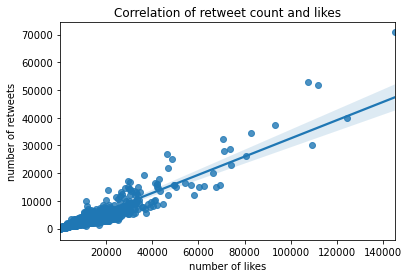

<Figure size 1080x1080 with 0 Axes>

In [231]:
sns.regplot(data =twitter_df, x = 'favorite_count', y = 'retweet_count');
plt.title('Correlation of retweet count and likes');
plt.xlabel('number of likes');
plt.ylabel('number of retweets');
plt.figure(figsize=[15,15]);

**Question 6:What is the relationship between likes,retweets and ratings?**

Text(0, 0.5, 'Number of Retweet ')

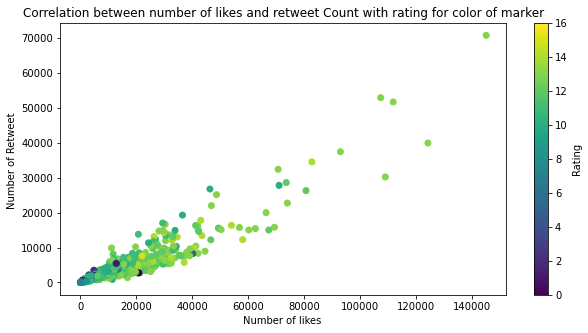

In [232]:
plt.figure(figsize = [10,5])
plt.scatter(data = twitter_df, x = 'favorite_count',y = 'retweet_count', c = 'rating')
plt.colorbar().set_label('Rating')

plt.title('Correlation between number of likes and retweet Count with rating for color of marker')
plt.xlabel('Number of likes ')
plt.ylabel('Number of Retweet ')

**Quick note**
- Findings confirm that every tweet has more likes than retweets!
- There is a strong positive correlation between likes and retweets
- There is a positive correlation ratings and likes and retweets
- Most of the ratings are higher than 10 

**Question7: Top 5 dog breeds with highest average likes**

**Question8: Top 5 dog breeds with highest average retweets**

**Question9: Top 5 dog breeds with highest average ratings**

In [262]:
#we only want to query dogs with an identified breed
dogbreeds=twitter_df.query('breed!="None"')

<AxesSubplot:title={'center':'top 5 breeds with the highest rating'}, xlabel='breed'>

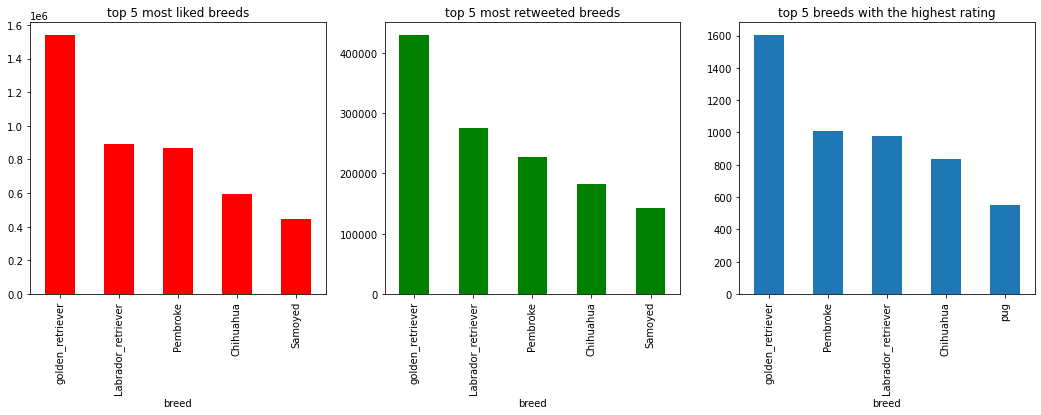

In [263]:
fig,axs=plt.subplots(1,3)
dogbreeds.groupby('breed')['favorite_count'].sum().nlargest(5).plot(kind='bar',ax=axs[0],figsize=(18,5),title='top 5 most liked breeds',color='r')
dogbreeds.groupby('breed')['retweet_count'].sum().nlargest(5).plot(kind='bar',ax=axs[1],figsize=(18,5),title='top 5 most retweeted breeds',color='g')
dogbreeds.groupby('breed')['rating'].sum().nlargest(5).plot(kind='bar',ax=axs[2],figsize=(18,5),title='top 5 breeds with the highest rating',)

**Quick note**
- 4 out of 5 breeds are common in all three variables.
- The golden retriever takes the top spot in all 3 tested variables.

**Question 10 : What is the most common source for the tweets?**

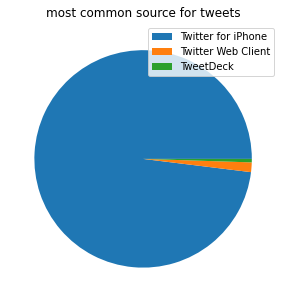

In [235]:
twitter_df['source'].value_counts().plot(kind='pie',figsize=(5,5),legend=True,labels=None,title='most common source for tweets',ylabel='');

**Quick note**
- The iPhone is clearly the predominant source for the tweets

**Question 11:Do newer tweets have more likes and retweets than older tweets?**
    
**Question 12: At what time of the day where tweets with the most likes and retweets created?**

In order to answer these questions,I will created two new temporary columns for number of days from the start and a column for time of the day a tweet was created

In [12]:
#create copy of twitter_archive_master
twitterdf_temp=twitter_df.copy()

In [241]:
twitterdf_temp.dtypes

tweet_id                        int64
timestamp         datetime64[ns, UTC]
rating                          int64
retweet_count                   int64
favorite_count                  int64
breed                          object
confidence                    float64
name                           object
dogstage                       object
source                         object
text                           object
dtype: object

In [243]:
#calculate minimun value in timestamp column and store in variable
first_day = twitterdf_temp['timestamp'].min()

In [244]:
#create new column for difference between minimun in timestamp column and each tweet's timestamp
twitterdf_temp['days'] = (twitterdf_temp['timestamp'] - first_day).dt.round('1d')/np.timedelta64(1,'D')

In [245]:
twitterdf_temp.head(1)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dogstage,source,text,days
0,890240255349198849,2017-07-26 15:59:51+00:00,14,6107,27988,Pembroke,51.13,Cassie,doggo,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,619.0


In [246]:
twitterdf_temp['hour_created']=pd.DatetimeIndex(twitterdf_temp['timestamp']).hour

In [248]:
#Group the hours into 4 time periods i.e. 12am-6am , 6am-12pm , 12pm-6pm , 6pm-12am
bin_edges=[-1,5,11,17,23]
bin_names=['12am-6am','6am-12pm','12pm-6pm','6pm-12am']
twitterdf_temp['hour_created']=pd.cut(twitterdf_temp['hour_created'],bin_edges,labels=bin_names)

In [249]:
twitterdf_temp.head(1)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dogstage,source,text,days,hour_created
0,890240255349198849,2017-07-26 15:59:51+00:00,14,6107,27988,Pembroke,51.13,Cassie,doggo,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,619.0,12pm-6pm


Two new columns have been successfully created.Lets answer the questions 11 and 12

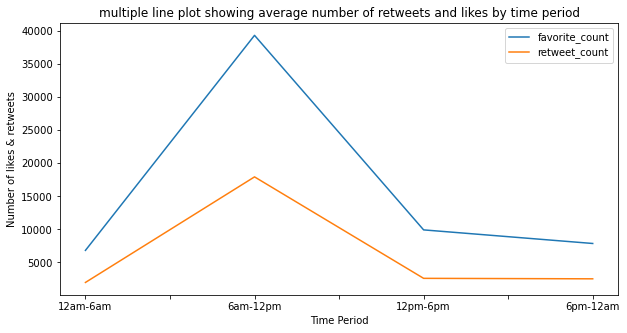

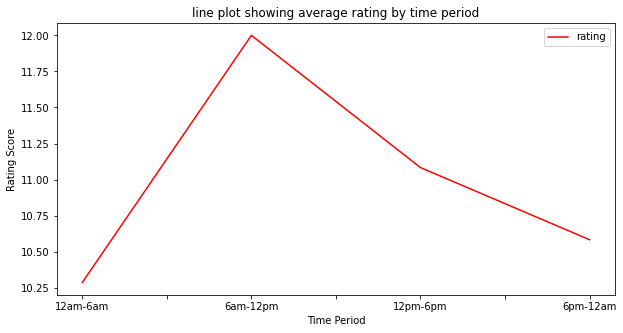

In [250]:
twitterdf_temp.groupby('hour_created')['favorite_count'].mean().plot(figsize=(10,5),legend=True,xlabel='Time Period',ylabel='Number of likes & retweets',title='multiple line plot showing average number of retweets and likes by time period');
twitterdf_temp.groupby('hour_created')['retweet_count'].mean().plot(figsize=(10,5),legend=True,xlabel='Time Period',ylabel='Number of likes & retweets',title='multiple line plot showing average number of retweets and likes by time period');
plt.show()
twitterdf_temp.groupby('hour_created')['rating'].mean().plot(figsize=(10,5),legend=True,xlabel='Time Period',ylabel='Rating Score',title='line plot showing average rating by time period',color='r');


**Quick note**
- tweets created between 6 am to 12 midday have the highest average retweets,likes and ratings!

Text(0, 0.5, 'likes')

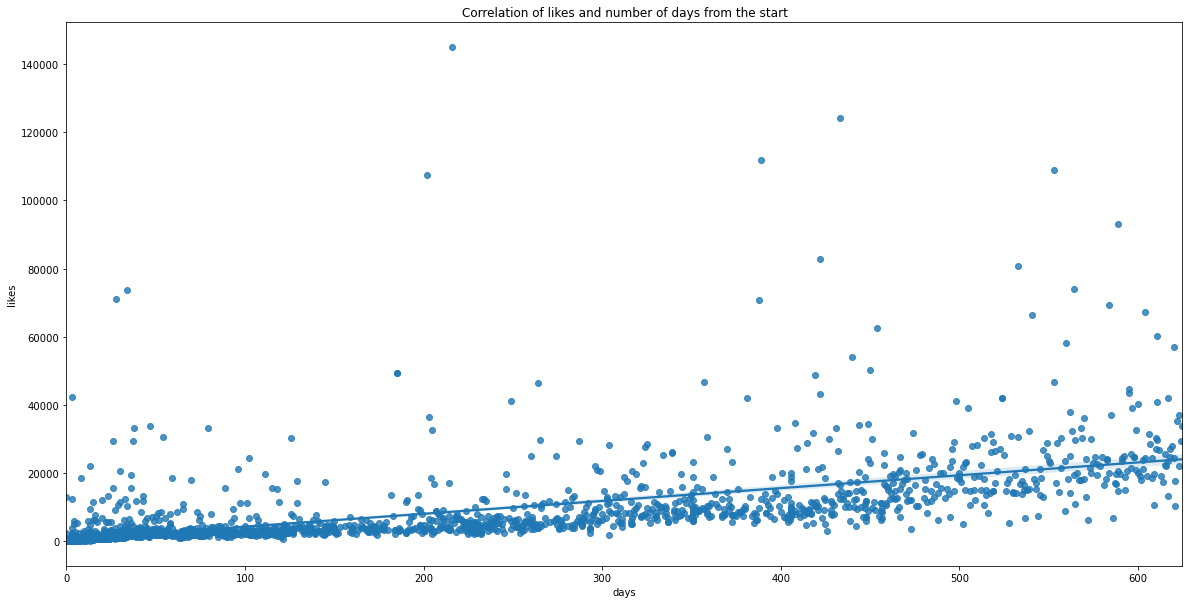

In [252]:
plt.figure(figsize=[20,10])
sns.regplot(data =twitterdf_temp, x = 'days', y = 'favorite_count')
plt.title('Correlation of likes and number of days from the start')
plt.xlabel('days')
plt.ylabel('likes')

**Quick notes**
- It looks like the newer tweets have more likes than the older tweets

<a id='insights'></a>
## KEY INSIGHTS
1. Tweets receive more likes/favorites than retweets
2. There is a strong positive correlation between likes and retweets
3. There is a also a positive correlation between likes,retweets and ratings
4. Most of the tweets generally have a high rating above 10
5. The golden retriever is the most popular breed
6. The best time of the day to tweet is between 6am and 12 midday 
7. Newer tweets generally receive more likes and retweets than older ones